In [4]:
# Instalación de librerías
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 69.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importación de dependencias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

(1600, 2) (400, 2)


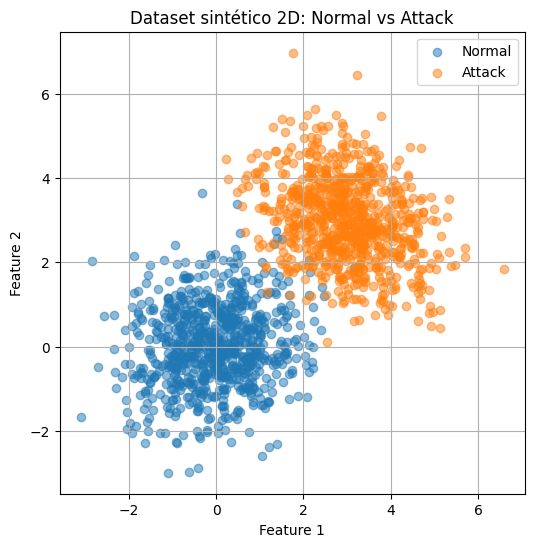

In [ ]:
# Semilla
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Número de muestras por clase
n_normal = 1000
n_attack = 1000

# Clase 0: tráfico normal (alrededor de (0,0))
mean_normal = [0, 0] # La nube de puntos de esta clase estará centrada al rededor de (0,0)
cov_normal = [[1.0, 0.2], # Valor 1 varianza 1 (cuanto se dispersan los valores al rededorde la media, -1-0-1, habiendo puntos más lejanos pero esta es la concentración natrual)
              [0.2, 1.0]] # Valor 1 varianza, y 0.2 de covarianza (como se realacionan ambas variables, si es psotivia crecen de igual manera, negativa una crece y otra decrece, y 0 sin relación)

# Clase 1: ataque (alrededor de (3,3))
mean_attack = [3, 3]
cov_attack = [[1.0, -0.3],
              [-0.3, 1.0]]

# Genera los datos
X_normal = np.random.multivariate_normal(mean_normal, cov_normal, n_normal) # 1000 filas 2 columnas, cada fila representa un punto en do dimensiones
X_attack = np.random.multivariate_normal(mean_attack, cov_attack, n_attack)

# Etiquetas
y_normal = np.zeros(n_normal, dtype=int) # Vector de mil ceros
y_attack = np.ones(n_attack, dtype=int) # Vector de mil unos

# Concatenar los datos
X = np.vstack([X_normal, X_attack]) # 1000 primeras filas normal, 1000 siguentes ataque 
y = np.concatenate([y_normal, y_attack]) # 1000 primeras filas normal, 1000 siguentes ataque 

# Dividimos el dataset en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y # Seleccionamos variables, el porcentaje de división, introducimos la semilla (para que sea reproducible), y stratify que haya igual número de clases de y
)

# Visualización
plt.figure(figsize=(6, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], alpha=0.5, label="Normal")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.5, label="Attack")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset sintético 2D: Normal vs Attack")
plt.grid(True)
plt.show()


In [6]:
# Creamos la carpeta data sino existe
os.makedirs("../data", exist_ok=True)

# Guardamos el archivo
np.savez("../data/synthetic_2d.npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)